In [ ]:
!pip install tensorflow
!pip install keras
!pip install opencv-python

# Classify whether the photo is a cat or a dog

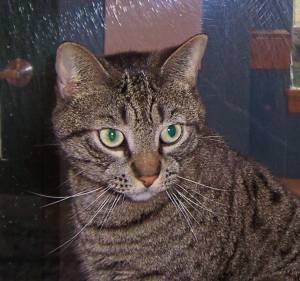

In [84]:
from IPython.display import Image
Image(filename='PetImages/Cat/1.jpg', width=300)

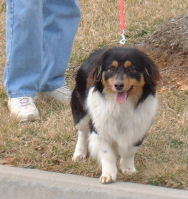

In [87]:
Image(filename='PetImages/Dog/2.jpg', width=300)

### Import packages

In [47]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
import time
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model

# Data Preperation
### Load Train Data

In [27]:
DIRECTORY = 'PetImages'
CATEGORIES = ['Cat', 'Dog']

In [28]:
IMG_SIZE = 150
data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) #resize photos to 150x150
        data.append([img_arr, label])

In [29]:
# mix photos
random.shuffle(data)

In [30]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [31]:
X = np.array(X)
y = np.array(y)

In [32]:
# save data for later so as not to repeat data preparation steps
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [33]:
NAME = f'cat-vs-dog-prediction-conv_1_dropout_0_2_dense128_128_64'
tensorboard = TensorBoard(log_dir=f'logs\\{NAME}\\')

### Normalize

In [34]:
# load previously written data
X = pickle.load(open('X.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [35]:
X = X / 255 

In [36]:
X.shape

(24946, 150, 150, 3)

In [37]:
from sklearn.model_selection import train_test_split

# division of data into training and testing (e.g. 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Create model

In [48]:
model = Sequential(name="Cat_dog_3conv_drop_conv_2dense128_dense64")

model.add(Input(shape=(150, 150, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, input_shape=X_train.shape[1:], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [49]:
# model summary
print(model.summary())

Model: "Cat_dog_3conv_drop_conv_2dense128_dense64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,010 (2.06 MB)

 Trainable params: 539,010 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

None


### Compile and train

In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32, callbacks=[tensorboard])

Epoch 1/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 131s 254ms/step - accuracy: 0.5184 - loss: 0.6932 - val_accuracy: 0.6002 - val_loss: 0.6611
Epoch 2/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 125s 250ms/step - accuracy: 0.6101 - loss: 0.6567 - val_accuracy: 0.7142 - val_loss: 0.5621
Epoch 3/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 124s 249ms/step - accuracy: 0.7161 - loss: 0.5508 - val_accuracy: 0.7851 - val_loss: 0.4647
Epoch 4/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 124s 249ms/step - accuracy: 0.7782 - loss: 0.4606 - val_accuracy: 0.7756 - val_loss: 0.4932
Epoch 5/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 124s 248ms/step - accuracy: 0.8132 - loss: 0.4137 - val_accuracy: 0.8236 - val_loss: 0.3913
Epoch 6/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 124s 249ms/step - accuracy: 0.8409 - loss: 0.3536 - val_accuracy: 0.8332 - val_loss: 0.3750
Epoch 7/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 129s 259ms/step - accuracy: 0.8626 - loss: 0.3166 - val_accuracy: 0.8402 - val_loss: 0.3595
Epoch 8/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 128s 256ms/step - accuracy: 0.8836 -

In [51]:
# Save model
model.save('cat_dog_model.keras')

# Testing and analysis

### import additional packages (also previously imported for certainty)

In [54]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

### Unit test

In [56]:
# load model
model = load_model('cat_dog_model.keras')

# prepare a test photo
test_img = image.load_img('test.png', target_size=(150, 150))
test_img_arr = image.img_to_array(test_img) / 255.0
test_img_arr = np.expand_dims(test_img_arr, axis=0)

# prediction on a single image
categories = ['Cat', 'Dog']  # to be sure, define categories if the code with the previous definition has not been run
prediction = model.predict(test_img_arr)
predicted_class = categories[np.argmax(prediction)]

print("Predykcja:", predicted_class)



# evaluation on the test set
# X_test and y_test must be pre-loaded
loss, accuracy = model.evaluate(X_test, y_test)
print("Strata:", loss)
print("Dokładność:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predykcja: Dog
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.8467 - loss: 0.6635
Strata: 0.691084086894989
Dokładność: 0.8406813740730286


In [57]:
# metrics
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Macierz konfuzji:\n", confusion_matrix(y_test, y_pred))
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred, target_names=categories))

156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step
Macierz konfuzji:
 [[2014  442]
 [ 353 2181]]
Raport klasyfikacji:
               precision    recall  f1-score   support

         Cat       0.85      0.82      0.84      2456
         Dog       0.83      0.86      0.85      2534

    accuracy                           0.84      4990
   macro avg       0.84      0.84      0.84      4990
weighted avg       0.84      0.84      0.84      4990



In [ ]:
### Metrics